In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import json

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2)) 
    
def show_img(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.axis('on')
    plt.show()
    
def predict_malti(predictor, image_path, points):
    image = cv2.imread(image_path)
    predictor.set_image(image)
    input_point = np.array([p for p in points])
    input_label = np.array([1 for p in points]) 
    masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)
    mask_input = logits[np.argmax(scores), :, :]  # Choose the model's best mask
    masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    mask_input=mask_input[None, :, :],
    multimask_output=False,
)
    masks.shape
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(masks, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.axis('on')
    plt.show()

def OnMouse(event, x, y, flags, params):
    coordinate = []
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x,y)
        coordinate.append((x, y))

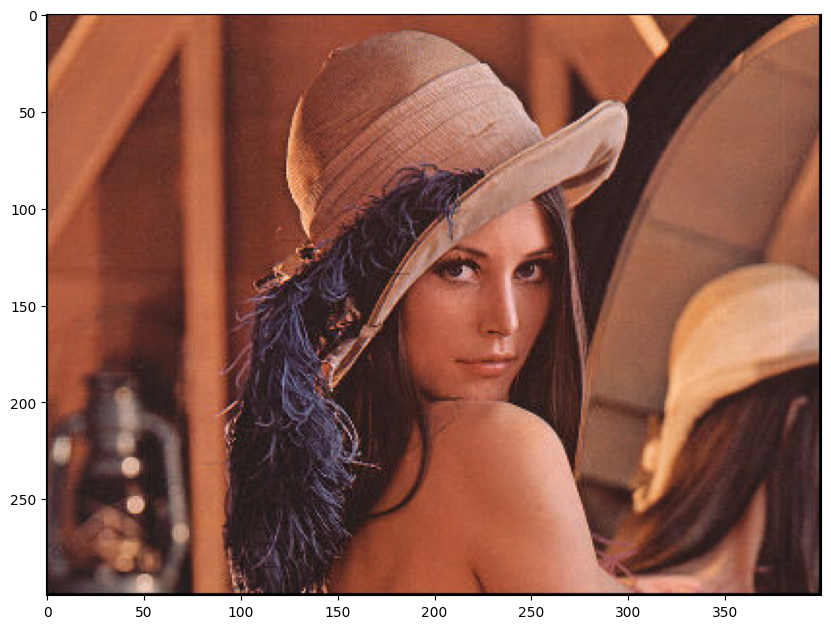

In [7]:
import os
from PIL import Image

# 画像が保存されているディレクトリのパス
image_dir = 'images/'

# ディレクトリ内のすべてのファイルを取得
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    show_img(image_path)

In [8]:
import sys
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "checkpoint/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

/home/nanashimau/vsc/.venv/lib/python3.10/site-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


RuntimeError: No CUDA GPUs are available

In [ ]:
for image_file in image_files:
        coordinates = []
        image_path = os.path.join(image_dir, image_file)
        img = cv2.imread(image_path)
        cv2.imshow("image", img)
        cv2.setMouseCallback("image", OnMouse)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        predict_malti(predictor, image_path, coordinates)